# Data Analysis
# Statistical inference and hypothesis testing 

In this lecture, we'll cover 
* Data collection and sampling (see slides)
* Statistical inference
* Central limit theorem
* Hypothesis testing and the z-test
* A/B testing (bootcamp activity)
* Other statistical significance tests
* Confidence intervals

Mandatory reading:
+ [WIRED article on A/B testing](https://www.wired.com/2012/04/ff-abtesting/)

Mandatory listening:
+ [Planet Money Episode 677: The experiment experiment](https://www.npr.org/sections/money/2018/03/07/591213302/episode-677-the-experiment-experiment)
+ [Planet Money Episode 669: A or B](https://www.npr.org/sections/money/2015/12/11/459412925/episode-669-a-or-b) 

Further reading: 
+ Jay L. Devore, Probability and Statistics for Engineering and the Sciences, 9th ed. Cengage Learning (2016) Ch. 8 and 9.
+ R. Nuzzo, Scientific method: Statistical errors, Nature (2014) [link](https://doi.org/10.1038/506150a)
+ J. Cohen, The Earth is Round (p<0.05), American Psychologist (1994) [link](https://doi.org/10.1037/0003-066x.49.12.997)

In [146]:
#imports and setup
import pandas as pd
import numpy as np

import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import probplot

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## 1. Descriptive vs. Inferential Statistics 

*Descriptive statistics* quantitatively describe or summarize features of a dataset. 

*Inferential statistics* attempts to learn about the *population* from which the data was *sampled*. 

**Example**: The week before an election, it is not possible to ask every voting person who they intend to vote for. Instead, a relatively small number of individuals are surveyed. The *hope* is that we can determine the population's vote from the surveyed results. 

Often, we will model the population as a *probability distribution*. 

*Inferential statistics* is deducing properties of an underlying probability distribution from sampled data. 

## Data distribution and generation: Random variables

An *empirical distribution* is a distribution that is based on observational data, e.g. think about your answers to a poll. It shows us values and proportions.

A *probability distribution* would give us a model for how the sample is generated, e.g. think about what the polling of a student in class would be.

In short, empirical distributions show us "what it is" (or "was"), but probability distributions show us "what it could be".

A *random variable* is a variable that takes numerical values based on some probabilities.

* Example 1: Let X take value 1 if a person answers yes to a question, or 0 if a person answers no.
* Example 2: Let Y be the outcome of a fair die


## Abstracting random chance

What do the following have in common?

* Ask somebody what they will vote in a referendum
* The outcome of a flip coin
* The outcome of a COVID test for a randomly selected Maastricht resident

In the previous example, each of these events have only two outcomes, one of which happens with a particular probability $p$.

## 1.1 Discrete Random Variables and Probabilty Mass Functions (PMF)

### 1.1.1 Bernoulli Distribution

The Bernoulli distribution, named after Jacob Bernoulli, is the probability distribution of a random variable which takes the value 1 (success) with probability $p$ and the value 0 (failure) with probability $q=1-p$. 

The Bernoulli distribution with $p=0.5$ (implying $q=0.5$) describes a 'fair' coin toss where 1 and 0  represent "heads" and "tails", respectively. If the coin is unfair, then we would have that $p\neq 0.5$.

We can use python to sample from the Bernoulli probability distribution. 

In [147]:
n = 1000;
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(coin_flips)

[0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1
 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1
 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0
 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 1 0 

How many heads did we get? We just count the number of 1's. 

In [148]:
print(sum(coin_flips))
print(sum(coin_flips)/n)

481
0.481


What if we flip the coin more times? 

In [149]:
n = 10000000
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(sum(coin_flips)/n)

0.4996799


Some facts about Bernoulli variables: 
* mean is p
* variance is p(1-p)

## What do these examples have in common?

* Count the number of people that answered "yes" in a referendum in a sample of n=10
* The total number of heads in a series of 5 coin flips 
* The total number of Maastricht residents that will test positive for COVID in a given month

In the previous question, the answer is that each of these events could be seen as a sum of Bernoulli random variables. Is that a good idea? It really depends on whether the individual variables are independent.

### 1.1.2 Binomial distribution

The binomial distribution, with parameters $n$ and $p$, is a discrete probability distribution "summarizing" the outcome of $n$ Bernoulli random variables. For simplicity, take $p=0.5$ so that the Bernoulli distribution describes the outcome of a coin. For each flip, the probability of heads is $p$ (so the probability of tails is $q=1-p$). But we don't keep track of the individual flips. We only keep track of how many heads/tails there were in total. So, the binomial distribution can be thought of as summarizing a bunch of (**independent**) Bernoulli random variables. 

The following code is equivalent to flipping a fair (p=0.5) coin n=10 times and counting the number of heads and then repeating this process 1,000,000 times. 

In [150]:
p = 0.5
n = 10
bin_vars = binom.rvs(n=n,p=p,size=1000000)
print(bin_vars[:100])

[4 5 5 5 5 5 5 4 7 3 6 8 4 6 5 6 5 3 6 5 4 3 3 2 2 5 8 5 4 7 4 7 3 6 3 7 6
 6 7 6 1 3 8 5 3 7 4 4 6 6 3 4 4 3 7 5 6 7 5 6 7 4 5 4 4 6 8 4 5 6 6 7 3 4
 8 3 6 6 4 5 3 6 6 7 4 3 4 4 2 3 8 7 3 5 7 8 5 6 5 3]


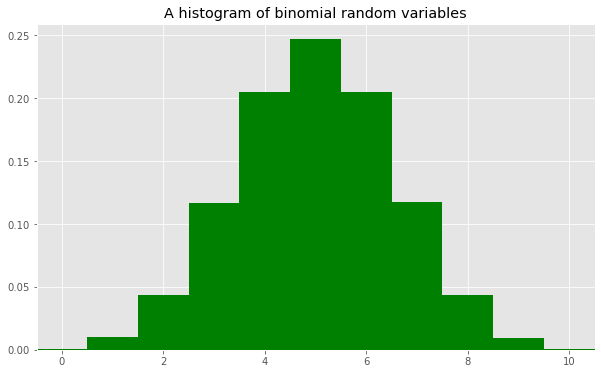

In [151]:
bins=np.arange(12)-.5
plt.hist(bin_vars, bins=bins, density=True, color="green")
plt.title("A histogram of binomial random variables")
plt.xlim([-.5,10.5])
plt.show()

Some facts about the binomial distribution: 
* The mean is $np$
* The variance is $np(1-p)$

### 1.1.3 Defining probability mass functions 

The Binomial and Bernoulli random variables are examples of *discrete random variables* since they can take only discrete values. A Bernoulli random variable can take values $0$ or $1$. A binomial random variable  can only take values 
$$
0,1,\ldots, n. 
$$
One can compute the probability that the variable takes each value. This is called the *probability mass function*. 


For a Bernoulli random variable, the probability mass function is given by 
$$
\textrm{Prob}(X=k) = f(k) = \begin{cases} p & k=1 \\ 1-p & k = 0 \end{cases}
$$


For a binomial random variable, the probability mass function is given by 
$$
f(k) = \binom{n}{k} p^k (1-p)^{n-k}.
$$
Here, $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the number of ways to arrange the
$k$ heads among the $n$ flips. For a fair coin, we have $p=0.5$ and $f(k) = \binom{n}{k} \frac{1}{2^n}$. This is the number of ways to arrange $k$ heads among $n$ outcomes divided by the total number of outcomes. 

The probability mass function can be plotted using the scipy library as follows.

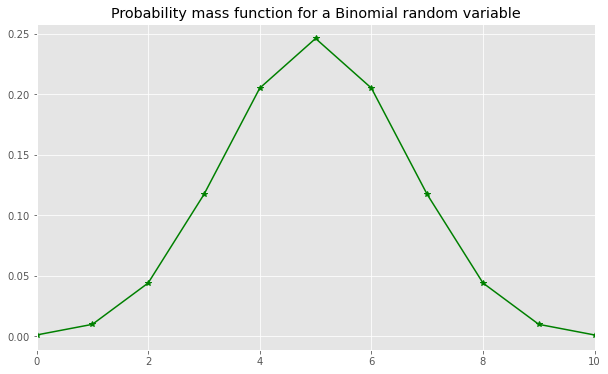

In [152]:
f = lambda k: binom.pmf(k, n=n,p=0.5)

x = np.arange(n+1);
plt.plot(x, f(x),'*-', c="g")
plt.title("Probability mass function for a Binomial random variable")
plt.xlim([0,n])
plt.show()

Observe that the probability mass function looks very much like the histogram plot! (Coincidence? I don't think so...) 


## 1.2 Continuous random variables and probability density functions  (PDF)

If a random variable takes continuous values (not discrete), then it's a *continuous* random variable. The most common example of a random variable is the *normal*, the values of which are determined by the *normal (or gaussian)* distribution.

### 1.2.1 Normal (Gaussian) distribution 

Roughly speaking, normal random variables are described by a "bell curve".  The curve is centered at the mean, $\mu$, and has width given by the standard deviation, $\sigma$. 

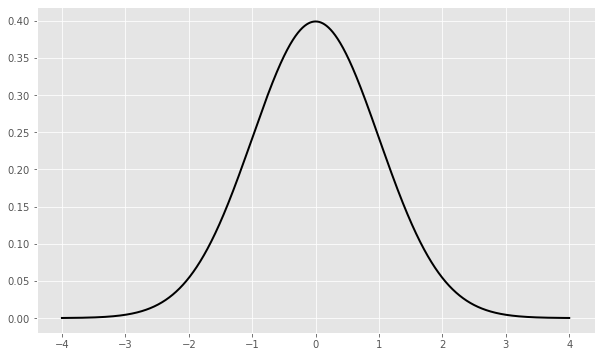

In [153]:
mu = 0 # mean
sigma = 1 # standard deviation 
x = np.arange(mu-4*sigma,mu+4*sigma,0.001);
pdf = norm.pdf(x,loc=mu, scale=sigma)
# Here, I could have also written
# pdf = 1/(sigma * sc.sqrt(2 * sc.pi)) * sc.exp( - (x - mu)**2 / (2 * sigma**2)) 
plt.plot(x, pdf, linewidth=2, color='k')
plt.show()

### 1.2.2 Defining probability density functions (PDF) and cumulative distribution functions (CDF)

A normal random variable can take any real value, but some numbers are more likely than others. More formally, we say that the *probability density function (PDF)* for the normal (Gaussian) distribution is
$$
f(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} },
$$
where $\mu$ is the mean and $\sigma$ is the variance. What this means is that the probability that a normal random variable will take values in the interval $[a,b]$ is given by 
$$
\textrm{Prob}(X\in[a,b]) = \int_a^b f(x) dx.
$$
This is just the area under the curve for this interval. For $a=\mu-\sigma$ and $b = \mu+\sigma$, we plot this below.

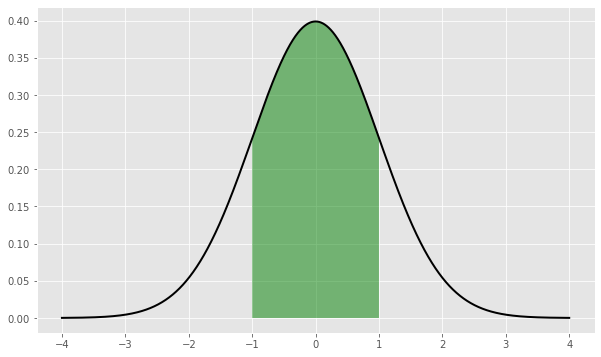

In [154]:
plt.plot(x, pdf, linewidth=2, color='k')
x2 = np.arange(mu-sigma,mu+sigma,0.001)
plt.fill_between(x2, y1= norm.pdf(x2,loc=mu, scale=sigma), facecolor='green', alpha=0.5)
plt.show()

One can check that 
$$
\int_{-\infty}^\infty f(x) dx = 1
$$
which just means that the probability that the random variable takes value between $-\infty$ and $\infty$ is one. 

This integral can be computed using the *cumulative distribution function* (CDF)
$$
F(x) = \int_{-\infty}^x f(x) dx.
$$
We have that 
$$
\int_a^b f(x) dx = F(b) - F(a)
$$

We used to have to look the CDF values up in a table (yes, I am that old.)

E.g. the following
$$
\int_{\mu-\sigma}^{\mu+\sigma} f(x) dx = F(\mu+\sigma) - F(\mu-\sigma)
$$
we can compute as follows:

In [155]:
norm.cdf(mu+sigma, loc=mu, scale=sigma) - norm.cdf(mu-sigma, loc=mu, scale=sigma) 

0.6826894921370859

This means that 68% of the time, this normal random variable will have values between $\mu-\sigma$ and $\mu+\sigma$.

Similarly, 95% of the time the normal random variable will have values between $\mu-2\sigma$ and $\mu+2\sigma$ and 99.7% of the time between $\mu-3\sigma$ and $\mu+3\sigma$.

![normdist](normdist.png)


Let's see what it looks like if we sample 1,000,000 normal random variables and then plot a histogram. 

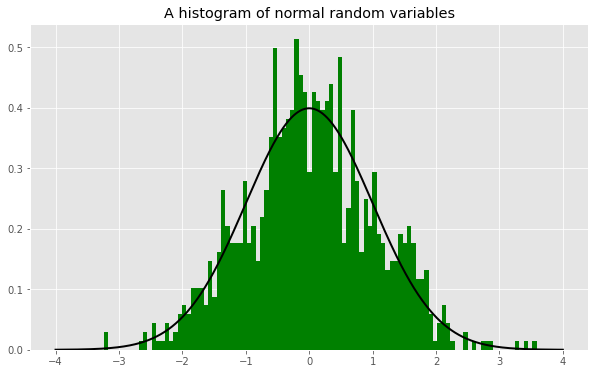

In [156]:
norm_vars = norm.rvs(loc=mu,scale=sigma,size=1000)

plt.hist(norm_vars, bins=100, density=True, color="g")
plt.plot(x, pdf, linewidth=2, color='k')
plt.title("A histogram of normal random variables")
plt.show()

The histogram of the sampled variables looks just like the probability distribution function!


**Remark:** There are many other continuous random variables, but in this class we'll mostly only consider the normal random variable.

# 2 One sample statistical inference

## 2.1 Checking if a random variable is a normal random variable 

Given sample data, $x_1, x_2, x_3 \ldots$, how do you know if the data came from a normal distribution? 

+ There is a visual check called the "normal probability plot". 

In a [normal probability plot](https://en.wikipedia.org/wiki/Normal_probability_plot), the sorted data are plotted vs. values that are selected to make the points look close to a straight line if the data are approximately normally distributed (in `scipy` this happens with a [specific formula](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)). Deviations from a straight line suggest departures from normality. Here we also do the $z$-score normalization:

$$
z_i = \frac{x_i - \bar{x}}{s}. 
$$

Let's look at the first plot. Does this look like it comes from a normal distribution to you?

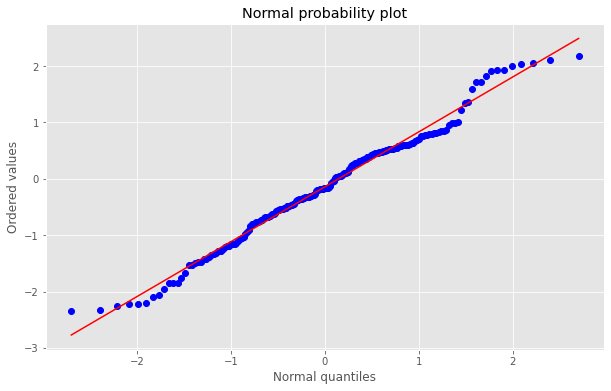

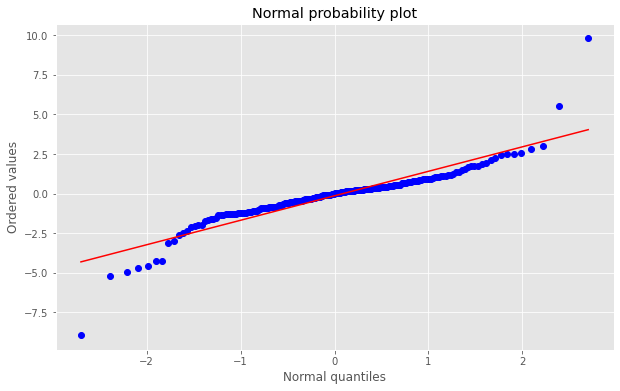

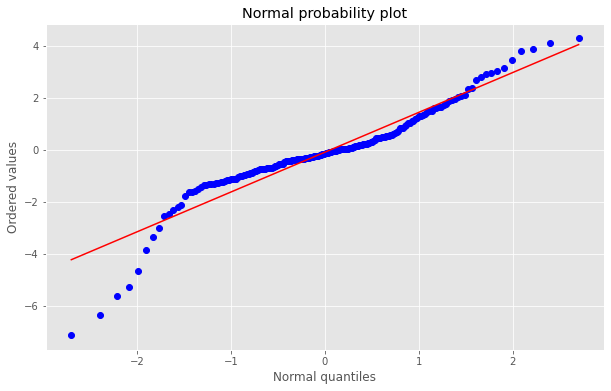

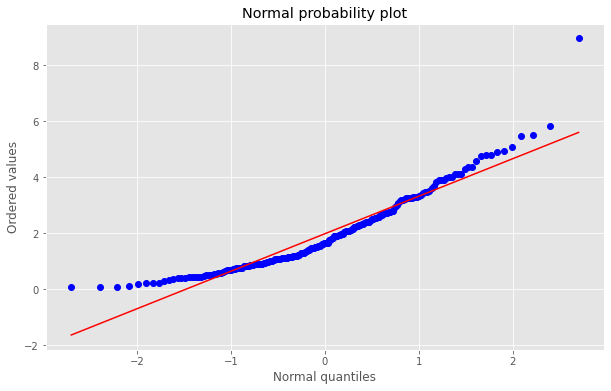

In [157]:
samp_size = 200

x = norm.rvs(loc=0, scale=1, size=samp_size)
probplot(x, plot=plt)
plt.title("Normal probability plot")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()

x = t.rvs(df=3,size=samp_size)
probplot(x, plot=plt)
plt.title("Normal probability plot")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()

from scipy.stats import laplace
x = laplace.rvs(size=samp_size)
probplot(x, plot=plt)
plt.title("Normal probability plot")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()

from scipy.stats import gamma
x = gamma.rvs(a=2,size=samp_size)
probplot(x, plot=plt)
plt.title("Normal probability plot")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()

**Example for z-score normalization**

Chernova took the gold in the Olympics 2012 with a long jump of 6.54 m for the women’s heptathlon, about 0.5 m further than the mean distance. Jessica Ennis won the 200 m run with a time of 22.83 s, more than 2 s faster than average.

Whose performance was more impressive (assuming that the performance of the athletes follows a normal distribution) ?

A. Chernova <br>
B. Ennis <br>
**C. Can't say <br>**
D. Unicorns are gray <br>











If we verified that both performance scores were following a normal distribution and had access to the standard deviation of both performances (long jump and the run), we would be able to compute the $z$-scores and compare them. E.g. if $\sigma$ is 0.56 m for the long jump and 0.80 s for the run then we could calculate as follows:

$$
z_1 = \frac{6.54-5.91}{0.56} = 1.1 \\
z_2 = \frac{22.83-24.60}{0.80} = -2.1
$$

## 2.2 Towards hypothesis testing and the importance of Central Limit Theorem (CLT)

Suppose we have a coin and we want to determine whether or not it is 'fair'. We could flip it many, many times and count how many heads we obtain. If the fraction of heads is approximately $0.5$, we might argue that the coin is fair. 

This is an example of statistical inference: We are trying to determine something about the coin (aka the *populations*) from the coin flips (aka the *sample*). 

Let's say we flip a coin $n=1000$ times. **If** the coin is fair, the outcome is described by the Binomial distribution with $p=0.5$. In real-world, we wouldn't have access to the actual distribution (the Binomial) that the sample follows, so here comes handy the Central Limit Theorem (CLT).

**Central Limit Theorem.** Let $\{X_1,\ldots, X_n\}$ be a sample of $n$ random variables chosen identically and independently from a distribution with mean $\mu$ and finite variance $\sigma^2$. If $n$ is 'large', then 
- the sum of the variables $\sum_{i=1}^n X_i$ is also a random variable and is approximately **normally** distributed with mean $n\mu$ and variance $n\sigma^2$ and
- the mean of the variables $\frac{1}{n}\sum_{i=1}^n X_i$ is also a random variable and is approximately **normally** distributed with mean $\mu$ and variance $\frac{\sigma^2}{n}$.

You also see why the normal distribution is **so important**. 

So, how can we use the central limit theorem (CLT)? 


So the CLT tells us that if $n$ is large, binomial random variables will be distributed approximately normally. That is, if we flip a coin many times, the number of heads that we're likely to see is described by a normal distribution. This provides a different and easier way to answer the question: How unlikely is it to flip a fair coin 1000 times and see 545 heads? 

Suppose we flip a fair ($p=0.5$) coin 1000 times. 

*Question:* How many heads do we expect to see? 

The CLT says that the number of heads (= sum of Bernoulli r.v. = binomial r.v.) is approximately normally distributed with mean 
$$ 
n\mu = np = 1000*0.5 = 500 
$$
and variance 
$$ 
n \sigma^2 = np(1-p) = 1000*0.5*0.5 = 250. 
$$

Let's do an experiment* to see how good the CLT is for Bernoulli random variables. We'll call flipping a fair coin n=1,000 times and counting the number of heads a "simulation". Recall that the outcome is precisely a binomial random variable with n=1,000 and p = 0.5. We'll do 10,000 simulations and then compare the histogram of the binomial random variables and the normal distribution predicted by the CLT. 

***Note** In real-life, the experiment would be to actually collect the data/sample.

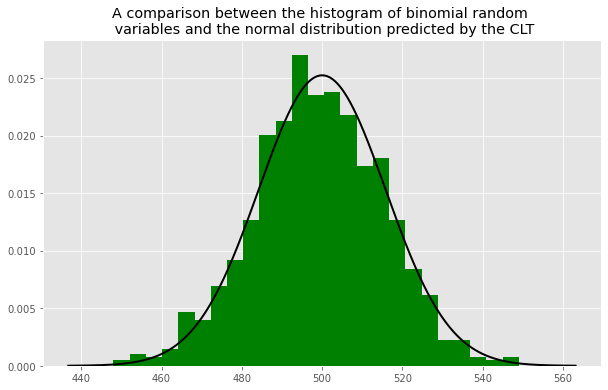

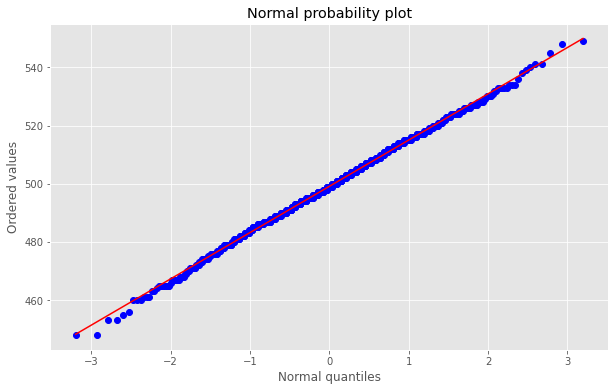

In [158]:
n = 1000
p = 0.5
bin_vars = binom.rvs(n=n,p=p,size=1000)

plt.hist(bin_vars, bins='auto',density=True, color="g")

mu = n*p 
sigma = np.sqrt(n*p*(1-p))
x = np.arange(mu-4*sigma,mu+4*sigma,0.1);
pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, linewidth=2, color='k')
plt.title("A comparison between the histogram of binomial random \n variables and the normal distribution predicted by the CLT")
plt.show()


probplot(bin_vars, plot=plt)
plt.title("Normal probability plot")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()


Ok, so now that the CLT works, let's see how we can integrate it in hypothesis testing.

## 2.3 Hypothesis Testing formulation

In hypothesis testing, the most important question is: What is the probability of seeing a value as extreme or more extreme than the value that we observed? 

In the coin flipping we might say that any result $\geq 545$ is 'as or more extreme'. Actually, seeing any result  $≤455$ would be 'as or more extreme' too. Why?

Can I compute that probability? Yes! With a bit of creative math and the help of CLT. *(In Section 6, you can see how we would compute the same probability with the binomial distribution)*. 

For calculation reasons, we inverse the question: What is the likelihood of flipping a coin 1000 times and seeing an event *less extreme* than 545 heads? 

The CLT tells us that the mean of the outcome should be a normal distribution! And that is computed by: 
$$
\textrm{Prob}(X\in[455,545]) = \int_{455}^{545} f(x) dx = F(545) - F(455).
$$

This is something that we can easily evaluate using the cumulative distribution function (CDF) on the normal distribution.

0.9955734741420801
0.004426525857919916


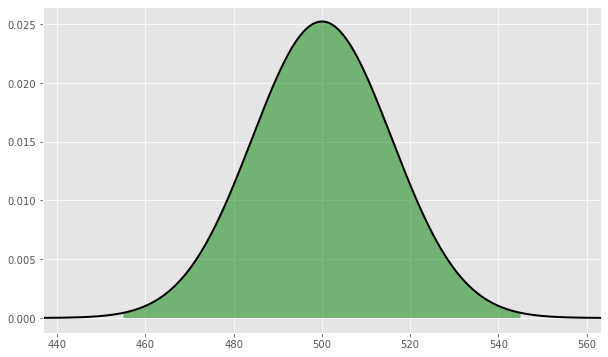

In [159]:
n = 1000
p = 0.5
mu = n*p
sigma = np.sqrt(n*p*(1-p))
prob = norm.cdf(545, loc=mu, scale=sigma) - norm.cdf(455, loc=mu, scale=sigma) 
print(prob)   # Approximate probability of seeing something less extreme
print(1-prob) # Approximate probability of seeing something more extreme

# a plot illustrating the integral 
x = np.arange(mu-4*sigma,mu+4*sigma,0.001);
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma), linewidth=2, color='k')
x2 = np.arange(455,545,0.001)
plt.fill_between(x2, y1= norm.pdf(x2,loc=mu, scale=sigma), facecolor='green', alpha=0.5)
plt.xlim([mu-4*sigma,mu+4*sigma])
plt.show()

So we see that $99.5\%$ of the time, we would see an event less extreme than 545 heads.

What does that tell us? (carry on...)

If the coin were fair, the probability of seeing 545 heads is just $0.50\%$. So it is very unlikely that if the coin were fair, we would see this result! Maybe so unlikely that we would declare that the coin is unfair? This is the idea behind **hypothesis testing**. 

**Note**: I didn't say that "it is unlikely that the coin is fair". But rather: "if the coin was fair, it would be unlikely to see this result". 

In *hypothesis testing*, we make a null hypothesis, written $H_0$. In this case, the null hypothesis is

$$
H_0: \text{the coin is fair, i.e., $p=0.5$}.
$$

The alternative hypothesis, $H_a$, is typically the hypothesis that the researcher wants to validate. In this case: 

$$
H_a: \text{the coin is unfair, i.e., $p\neq 0.5$}.
$$

We also choose a *significance level* for the test, $\alpha$, traditionally $1\%$ or $5\%$. 
In this case, let's choose a significance level of $\alpha = 1\%$. 

We then collect a *random sample*. In this case, we flip the coin 1000 times and count the number of heads (in this case 545). More generally, we collect a random sample of data from the population of interest. 

Finally, assuming the null hypothesis is true, we compute how likely it is to see a number that is at least as far from the expected value as the number obtained from the random sample. In our case, this is $0.50\%$. This is called the *p-value*. Since $p=0.50\%$ is smaller than the chosen significance level, $\alpha = 1\%$, we reject the null hypothesis and declare the coin to be unfair.  

Some comments about the p-value:
1. A p-value is a probability calculated assuming that $H_0$ is true. 
+ The smaller the p-value, the stronger the evidence against $H_0$.
+ Read more about "hacking" p-values in section 5.
+ **Warning:** A p-value is not the probability that the null hypothesis is true or false. It is the probability of observing an event as extreme as the one we did, assuming the null hypothesis to be true. In this example, it is the probability that, assuming the coin is fair, one would observe a count which is 45 or more away from the mean (i.e. $\textrm{Prob}(|X - \mu| \geq 45) =\textrm{Prob}(X - \mu \geq 45)+ \textrm{Prob}(X - \mu \leq -45)$).

### 2.3.1 Example: Debunking the lockdown weight gain 

(Adapted from Devore, pp.314-315.)

A common belief is that students during the extensive lockdown (after the $n$-th wave) gained weight, approx. around 2 kg.

Let $\mu$ denote the true average weight gain after the lockdown. We take the null hypothesis to be
$$
H_0: \mu \geq 2
$$
so that the alternative hypothesis is that the average weight gain after the lockdown is less than 2 kg ($H_a:  \mu < 2$). 

We set a significance level of, say, $\alpha = 1\%$. 

We suppose a random sample of $n$ students is selected, their weights (before and after the lockdown) are measured, and the sample mean $\bar{x}$ and sample standard deviation $s$ are computed. Suppose we do the experiment with this class, we have a sample of $n=129$ students, the sample mean weight gain was $\bar{x}=0.56$ kg and with a sample standard deviation of $s=0.75$ kg. 

Assuming $H_0$ to be true, how unlikely is it that we would observe such a value ($\bar{x}=0.56$)?  

The CLT says that 
+ the mean of the variables $\bar{X}=\frac{1}{n}\sum_{i=1}^n X_i$ is a random variable and is approximately **normally** distributed with mean $\mu$ and variance $\frac{\sigma^2}{n}$.


We take a normal distribution with mean given by the null value ($\mu = 2$) and variance given by $s^2/n = (0.75)^2/129=0.0043604651$.

The $p$-value is then computed as the probability that $\bar{X}<0.56 = \bar{x}$, 
$$
P(\bar{X}< 0.56) = \int_{-\infty}^{0.56} f(x) dx = F(0.56).
$$

In [160]:
mu = 2
sigma = np.sqrt(0.75**2/129)
print('p:', norm.cdf(0.56, loc=mu, scale=sigma))

p: 9.9538362548315e-106


The p-value is practically zero, much less than the significance level! The data very strongly contradicts the null hypothesis. We reject the null hypothesis, $H_0$, and conclude that the lockdown weight gain is a myth (or is it not?). 

### 2.3.2 Example: Zinc in Batteries (study at home)

This example was taken from Devore, pp.317. 

A random sample of $n=51$ Panasonic AAA batteries gave a sample mean zinc mass of $\bar{X}=2.06$ grams and a sample standard deviation of $S=0.141$ grams. 

**Question**: Does this data provide compelling evidence for concluding that the population mean zinc mass exceeds 2.0 grams, as reported by the company? 

Let $\mu$ denote the true average zinc mass of such batteries. We take the null hypothesis to be
$$
H_0: \mu \leq 2.0
$$
and that the alternative hypothesis is
$$
H_a:  \mu > 2.0.
$$

We set a significance level of, say, $\alpha = 1\%$. 

According to the CLT, the sample mean $\bar{X}$ has approximately a normal distribution with mean $\mu = 2.0$ (Assuming $H_0$) and standard deviation $S/\sqrt{n}$. We could proceed as previously but it is more standard to normalize the variable.  

To proceed, we conduct a **z-test**, which is the same as we did in the previous example, except now we use the normalized $Z$-statistic, 
$$
Z = \frac{\bar{X} - 2.0}{S/\sqrt{n}}. 
$$
The $Z$-statistic is distributed according to the "standard" normal distribution with mean $\mu=0$ and standard deviation $\sigma = 1$.

Assuming $H_0$ to be true, how unlikely is it that we would observe such a large value ($\bar{X}=2.06$)?
$$
P-\textrm{value} = P (\bar{X} \geq 2.06) = P (Z\geq 3.04) = \int_{3.04}^\infty f(x) dx = 1 - F(3.04). = .0012.  
$$
Because the $P$-value $= .0012 \leq .01 = \alpha$, the null hypothesis should be rejected at the chosen significance level. We conclude that the average zinc mass in the batteries exceeds 2.0. 

In [161]:
print(1 - norm.cdf(2.06, loc=2.0, scale = 0.141/np.sqrt(51)))

z = (2.06 - 2.0) / (0.141/np.sqrt(51))
print(1 - norm.cdf(z, loc=0, scale=1))

0.0011871957647558995
0.0011871957647558995


## Summary of hypothesis testing and the z-test
1. Identify the parameter of interest and describe it in the context of the problem. 
+ Determine the null and alternative hypotheses.
+ Choose a significance level $\alpha$. 
+ Find the formula for the computed value of the test statistic, *e.g.*, 
$Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ (use the CLT). See Section 3 for other tests (e.g. for proportions).
+ Using the sampled data, compute the $P$-value, *e.g.*, $F(z)$
+ Compare the significance level to the $P$-value to decide whether or not the null hypothesis should be rejected and state the conclusion in the problem context. Report the $P$-value! 



### One- and two- sided hypothesis testing:

Depending on the null and alternative hypothesis, the $P$-value will be different integrals of the 'bell curve'. This is called [one- and two- sided hypothesis testing](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests).

<img src="determinePvals.png" width="600">
$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad$ 
source: Devore, pp.329


## 2.4 What to do for smaller sizes? Student's t-test

When $n$ is small, the Central Limit Theorem can no longer be used. In this case, if the samples are drawn from an approximately normal distribution, then the correct distribution to use is called the [Student's t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) with $\nu = n-1$ degrees of freedom. The probability density function (pdf) for the student's t distribution is not pretty (Google it!) but it is built into scipy, so we can compare the student's t-test to the normal distribution. 

In [162]:
# there is some trouble with this package for some python versions
# if it doesn't work, don't worry about it
from ipywidgets import interact 

samp_mean = 0
samp_std_dev = 1

x = np.linspace(samp_mean-4*samp_std_dev,samp_mean+4*samp_std_dev,1000);
def compare_distributions(sample_size):
    pdf1 = norm.pdf(x, loc=samp_mean, scale=samp_std_dev/np.sqrt(sample_size))
    pdf2 = t.pdf(x,df=sample_size-1,loc=samp_mean, scale=samp_std_dev/np.sqrt(sample_size))
    plt.plot(x, pdf1, linewidth=2, color='k',label='normal distribution pdf')
    plt.plot(x, pdf2, linewidth=2, color='g',label='t distribution pdf')
    plt.xlim(x.min(),x.max())
    plt.ylim(0,2)
    plt.legend()
    plt.show()
    
interact(compare_distributions,sample_size=(2,20,1))

interactive(children=(IntSlider(value=11, description='sample_size', max=20, min=2), Output()), _dom_classes=(…

<function __main__.compare_distributions(sample_size)>

The student's t distribution has "heavier tails" than the normal distribution. For a sample size greater than $\approx 20$ (or 30 or 40, depending on which textbook you follow or which statistician you ask), the normality assumption is generally accepted as reasonable. 

In the previous example, $n=51$, which is large enough to assume normality. 

## 3. Two Sample Hypothesis Tests

So far we have been concerned with statistical inference from a *single sample*. However it is usually more useful in statistical analysis to compare *two samples* from two different populations (or treatment groups). We are interested in whether there is a statistically significant difference between the two populations or treatment groups A and B.

If the variable of interest is **quantitative**, we compare the **means** $\mu_A$, $\mu_B$ of the two populations. For example:

\begin{align*} 
H_0: \mu_A &= \mu_B \\
H_A: \mu_A &\ne \mu_B
\end{align*}

If the variable of interest is **categorical** with 2 categories, we compare the **proportions** $p_A$, $p_B$ of the two populations. For example:

\begin{align*} 
H_0: p_A &= p_B \\
H_A: p_A &\ne p_B
\end{align*}

Here, $\mu_A, \mu_B$, $p_A$, $p_B$ appearing in $H_0$ and $H_A$ refer to the **population** parameters. We will evaluate whether there is significant evidence for $H_A$ using the **sample** statistics $\bar{x}_1$, $\bar{x}_2$, $\hat{p}_A$, $\hat{p}_B$. 

We'll let $n_A, n_B$ be the sample sizes from populations $A, B$ respectively.

### 3.1 Two sample HT's for means

When we have 2 independent samples, we compare the means with a **two sample $t$-test** (this is more robust to small sample sizes than $z$-tests).

**Example:** A nursing home records data on the age and gender of its residents who have passed away in the last five years. The ages of the 12 female residents and 10 male residents are given below. Is there significant evidence of a difference in mean age of death for males and females at this nursing home population?

Our hypotheses are:
\begin{align*} 
H_0: \mu_F &= \mu_M \\
H_A: \mu_F &\ne \mu_M
\end{align*}

Or alternatively

\begin{align*} 
H_0: \mu_F - \mu_M &= 0\\
H_A: \mu_F - \mu_M & \ne 0
\end{align*}

Then the t-statistic $t = \frac{\bar X_M - \bar X_F}{\sqrt{\left( \frac{S_M^2}{N_M} + \frac{S_F^2}{N_F} \right)}}$ is expected to follow a $t_{min}(n_F,n_M)−1$ distribution so i can use that one to compute the p-value.

In [163]:
female_death_age = [89, 74, 86, 72, 77, 84, 79, 97, 81, 85, 87, 76]
male_death_age = [72, 74, 77, 80, 77, 73, 68, 70, 69, 76]
from statistics import stdev
print(np.mean(female_death_age))
print(stdev(female_death_age)) #sample (not population) standard deviation, different than np.std
print(len(female_death_age))
print(np.mean(male_death_age))
print(stdev(male_death_age))
print(len(male_death_age))

82.25
7.149380138420139
12
73.6
3.921450978627398
10


We can run the $t$-test in python:

In [164]:
from scipy.stats import ttest_ind
t, pval = ttest_ind(female_death_age, male_death_age)
print(t, pval)

3.4131849715231763 0.002756242969512716


With a $p$-value of 0.0028, there is significant evidence of a difference, i.e. females are living longer. If we wanted to run a one-sided test ($H_A: \mu_F > \mu_M$), then we would just cut in half the two-sided $p$-value. We also could have run this test using summary statistics:

In [165]:
from scipy.stats import ttest_ind_from_stats
t, pval = ttest_ind_from_stats(82.25, 7.149, 12, 73.6, 3.921, 10)
print(t, pval)

3.4134081547669486 0.00275482397511862


### 3.2 Two sample HT's for proportions

When we have 2 independent samples of a binary categorical variable, we compare the proportions (i.e. percents) with a two sample $z$-test.

We make the following definitions:
- $N_A$ is the number of surveyed people from population $A$  
- $n_A$ is the number of successes from population $A$
- $p_A = n_A/N_A$ is the proportion of successes from population $A$

Similarly, we define 
- $N_B$ is the number of surveyed people from population $B$  
- $n_B$ is the number of successes from population $B$
- $p_B = n_B/N_B$ is the proportion of successes from population $B$

We make the null hypothesis:
$$
H_0\colon \text{$p_A$ and $p_B$ are the same, that is, } p_A - p_B = 0.
$$
That is, the proportion of successes in the two populations is the same. 

We'll take it as a fact (see Devore Ch. 9.4 or revisit your statistics) that: 
- $n_A/N_A$ is approximately a normal random variable with mean $p_A$ and variance $\sigma_A^2 = p_A(1-p_A)/N_A$ 
- $n_B/N_B$ is approximately a normal random variable with mean $p_B$ and variance $\sigma_B^2 = p_B(1-p_B)/N_B$
- $n_A/N_A - n_B/N_B = p_A-p_B$ is approximately a normal random variable with mean $\mu = 0$ and variance $\sigma^2 = \sigma_A^2 + \sigma_B^2$. 
- The test statistic called the *two-proportion z-value* (and can be deducted from the Z-statistic we saw before)
$$
Z = \frac{(p_A-p_B) - 0.0}{\sigma/\sqrt{(N_A+N_B)}} = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
is approximately  distributed according to the standard normal distribution when $H_0$ is true. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 

From the data, we estimate the mean, $\mu$, to be  $p_A - p_B$. 

### Example: 1954 Salk polio-vaccine experiment

In 1954, polio was widespread and a new vaccine of unknown efficacy was introduced. To test the efficacy, in a double-blind study, two groups of children were given injections: one contained the vaccine and the other contained a placebo. 

Let $p_A$ and $p_B$ be the proportions of the children, having received the placebo and vaccine injections, respectively, to contract polio. We formulate the null hypothesis that 
$$
H_0\colon p_A - p_B \leq 0,
$$
that is, the vaccine is not effective.
The alternative hypothesis is that 
$$
H_a\colon p_A - p_B >0, 
$$
that is, a vaccinated child is less likely to contract polio than a child receiving the placebo.

We choose a significance level of $\alpha = 0.01$. 

An experiment was conducted with the following results: 
$$
\begin{aligned}
&\text{Placebo:} \quad N_A = 201229, \quad n_A = 110 \\
&\text{Vaccine:} \quad N_B = 200745, \quad n_B = 33.
\end{aligned}
$$

In [166]:
nA = 110
NA = 201229
pA = nA/NA
muA = pA
sigmaA = np.sqrt(pA*(1-pA)/NA)

nB = 33
NB = 200745
pB = nB/NB
muB = pB
sigmaB = np.sqrt(pB*(1-pB)/NB)

Now we perform the hypothesis test and see what the probability of the outcome is under the assumption of the null hypothesis. 

In [167]:
phat = NA*pA/(NA+NB) + NB*pB/(NA+NB)
qhat = 1-phat

z = (pA - pB)/np.sqrt(phat*qhat*(1/NA + 1/NB)) 
print(z)

p_value = 1-norm.cdf(z)
print(p_value)

6.425812770083365
6.558342757756463e-11


The probability that an erroneous conclusion is reached, under the assumption of the null hypothesis, is $6.6\times10^{-11}$, way less than the significance level, $\alpha$. We reject the null hypothesis and declare that the vaccine is more effective than a placebo! 

### Motivation: A/B testing
*A/B testing* is a method of comparing two or more versions of an advertisement, webpage, app, etc. We set up an experiment where the variants are shown to users at random and statistical analysis is used to determine which is best. AB testing is the *de facto* test for many business decisions.  

**Example.** A/B testing was extensively used by President Obama during his 2008 and 2012 campaigns to  develop 
* optimized fund-raising strategies,  
* get-out-the-vote programs that would be most beneficial, and 
* target ads to the most susceptible audiences. 

A/B testing is used by all big companies (e.g. Google) to test customer response (e.g. if search results click through increases by having an underlined link).

Learn more here:
[Wired story on A/B testing](http://www.wired.com/2012/04/ff_abtesting/)
and 
[Planet Money Episode 669: A or B](https://www.npr.org/sections/money/2015/12/11/459412925/episode-669-a-or-b)

We are going to practice one example in the bootcamp

## 4. Most Common Statistical Tests (Summary)

| Variable type | # Groups | Classic approach | 
| --- | --- | --- |
| Quantitative | 2 | t-test | 
| >> | 3+ | ANOVA |
| Binary (proportions) | 2 | z-test | 
| >> | 3+ | $\chi^2$ test | 
| Categorical | 2+ | $\chi^2$ test | 



The classical approaches are typically parametric, based  on some underlying distributional assumptions of the individual data, and work well for large n (or if those assumptions are actually true).

The alternative approaches would be non-parametric in that there is no assumption of an underlying distribution, but they have slightly less power and may take more time & care to calculate. We do not cover them here.

### 2-sample t-test (as in paragraph 3.1)

Formally, the 2-sample t-test for the mean difference between 2 groups is:

$H_0 : µ_A = µ_B	\text{     vs.      }	H_A : µ_A != µ_B$

$$
t = \frac{\bar Y_A - \bar Y_B}{\sqrt{\left( \frac{S_A^2}{N_A} + \frac{S_B^2}{N_B} \right)}}.
$$

The p-value can then be calculated based on a $t_{min}(n_A,n_B)−1$ distribution. In python use: `scipy.stats.ttest_ind`

The assumptions for this test include:<br>
(i) independent  observations and <br>
(ii) normally distributed responses  within each group (or sufficiently large sample size).<br>

### 2-sample z-test (as in paragraph 3.2) 

Formally, the 2-sample z test for the difference in proportions between 2 groups:

$H_0 : p_A = p_B	\text{     vs.      }	H_A : p_A != p_B$

$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$


where $\hat{p} = \frac{N_A \times \hat{p}_A+N_B \times \hat{p}_B}{N_A+N_B}$ is the overall proportion of successes (and $\hat q = 1 - \hat p$).

The p-value can then be calculated based on a standard normal distribution. In python use: `statsmodels.stats.proportion.proportions_ztest`

The assumptions for this test include:<br>
(i) independent  observations and <br>
(ii) normally distributed responses  within each group (or sufficiently large sample size).<br>

### $\chi^2$ test for independence

In the descriptive statistics we saw how we can measure the association between quantitative variables. What about categorical variables? 

The classic approach to see if a categorical variable is different between 2 or more groups is the $\chi^2$  test for independence. A contingency table (or confusion matrix) illustrates the idea:

| Abortion should be | Republicans | Democrats || Total
| --- | --- | --- || ---
| Legal | 166 | 430 || 596
| Illegal | 366 | 345 || 711
| Total | 532 | 775 || 1307


If the two variables were independent, then:
$P (Y = 1 ∩ X = 1) = P (Y = 1)P (X = 1)$.
How far the inner cell counts are from what they are  expected to be under this condition is the basis for the  test.

Formally, the $\chi^2$ test for independence can be calculated  as follows:

$H_0$: the 2 categorical variables are independent<br>
$H_A$: the 2 categorical variables are not independent

The value of the statistic (based on the contingency matrix) is:

$$
\chi^2 = \sum_{\text{all cells}} \frac{(Obs-Exp)^2}{Exp}
$$

where:<br>

$Obs$ is the observed cell count (as read from the matrix) and <br>
$Exp$ is the expected cell count (iff independent), i.e. $Exp = \frac{\text{rowtotal  } \times \text{  columntotal}}{n}$

The p-value can then be calculated based on a $\chi^2_{df=(r-1)\times(c-1)}$ distribution ($r$ is the # of rows and $c$ is the # of columns}. In python we use the `scipy.stats.chi2_contingency`. The larger the $\chi^2$ value, the greater the probability that there really is a significant difference.

In [168]:
from scipy.stats import chi2_contingency

adj_mat = np.array([[166, 430], [366, 345]])
chi2_contingency(adj_mat)

(73.99676539033868,
 7.824513736375561e-18,
 1,
 array([[242.59525631, 353.40474369],
        [289.40474369, 421.59525631]]))

### ANOVA test

The classic approach to compare 3+ means is through  the Analysis of Variance procedure (aka, ANOVA). For example, look the picture below:

![](anova.png)

Formally, the ANOVA F test for differences in means among 3+ groups can be calculated as follows:

$H_0$: the mean response is equal in all $K$ groups.<br>
$H_A$: there is a difference in mean response somewhere among the group.

$$
F = \frac{ \frac{\sum_{k=1}^K N_K(\bar{Y_k}-\bar{Y})^2}{K-1}}{\frac{\sum_{k=1}^K (n_k-1) \sigma_k^2}{n-K}}
$$

where: <br>
$n_k$ is the sample size in group $k$,<br>
$\bar{Y}_k$ is the the mean response in group $k$,<br>
$\sigma_k$ is the variance of responses in group $k$,<br>
$n, Y, \sigma$ (without indices) are the same as above but for the overall sample

The p-value can then be calculated based on a Fdf1=(K−1),df2=(n−K) distribution. In python can be done via `scipy.stats.f_oneway`

In [169]:
#from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
from scipy.stats import f_oneway

tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

# Appendix

The following chapters are accompanying the lecture and you can study at home.

## 5. Considerations in hypothesis testing

### 5.1 Types of error

In hypothesis testing, there are [two types of errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors). 
+ A **type I error** is the incorrect rejection of a true null hypothesis (a "false positive"). 
+ A **type II error** is incorrectly accepting a false null hypothesis (a "false negative"). 

Depending on the application, one type of error can be more consequential than the other. 

![](InferenceErrors.png)
$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad$ 
source: [wikipedia](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)

The probability of making a type I (false positive) error is the significance level $\alpha$. 

The probability of making a type II (false negative) error is more difficult to calculate. 

**Examples**

**(1)** In vaccine testing, we take the null hypothesis (H0): "This vaccine has no effect on COVID19." A type I error detects an effect (the vaccine is effective against the disease) that is not present. A type II error fails to detect an effect (the vaccine is effective) that is present. 

**(2)** In a trial, we take the null hypothesis (H0): "This man is innocent." A type I error convicts an innocent person. A type II error lets a guilty person go free. 

![errors](pregnant.jpg)

### 5.2 P hacking

Recall that the p-value measures how extreme the observation is and is compared to the significance level. Some comments about the p-value:
1. A p-value is a probability calculated assuming that $H_0$ is true. 
+ The smaller the p-value, the stronger the evidence against $H_0$.
+ A p-value is not the probability that the null hypothesis is true or false. It is the probability that an erroneous conclusion is reached.

Recently the *misuse* of hypothesis testing (p-values) has raised considerable controversy. Basically, if you do enough hypothesis tests, eventually you'll have a Type I (false positive) error. This is sometimes referred to as [Data dredging](https://en.wikipedia.org/wiki/Data_dredging). This is a real problem in a world with tons of data in which it is easy to do many, many hypothesis tests automatically. One method to avoid this is called *cross-validation*, which we'll discuss later. 

You can read more about 'P hacking' here:

- R. Nuzzo, Scientific method: Statistical errors, Nature (2014) [link](https://doi.org/10.1038/506150a)

- J. Cohen, The Earth is Round (p<0.05), American Psychologist (1994) [link](https://doi.org/10.1037/0003-066x.49.12.997)

- [Planet Money Episode 677: The experiment experiment](https://www.npr.org/sections/money/2018/03/07/591213302/episode-677-the-experiment-experiment)

![cancer](cancer.png)


### 5.3 Confidence intervals

A [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) is an interval estimate for an unknown population parameter. For example, we might use collected data to give an interval estimate for a population mean. 

### Example: Ergonomic keyboards 

This example was taken from Devore, pp.277.

*Question*: A study is conducted to estimate the preferred height for an experimental keyboard with large forearm-wrist support. A sample of $n=31$ trained typists was selected, and the preferred keyboard height was determined for each typist. The resulting sample average preferred height was $\bar{X} = 80.0$ cm. Assuming that the preferred height is normally distributed with $\sigma = 2.0$ cm, obtain a confidence interval for $\mu$, the true average preferred height for the population of all typists. 

The CLT tells us that the sample mean $\bar X$ is normally distributed with expected value $\mu$ and standard deviation $\sigma / \sqrt n$. Standardizing $\bar X$ by subtracting the expected value and dividing by the standard deviation yields the standard normal variable 
$$
Z = \frac{\bar X - \mu}{\sigma / \sqrt n}.
$$

Since $Z$ is a standard normal variable, and the integral under the standard normal curve between -1.96 and 1.96 is 0.95, we have that 
$$
P( -1.96 < Z < 1.96) = 0.95.
$$

In [170]:
norm.cdf(1.96) - norm.cdf(-1.96)

0.950004209703559

Let's manipulate the inequalities inside the parenthesis:
$$
-1.96 \ < \ \frac{\bar X - \mu}{\sigma / \sqrt n} \ < \ 1.96.
$$
This is equivalent to 
$$
\bar X -1.96 \frac{\sigma}{\sqrt n} \ < \ \mu \ < \ \bar X + 1.96\frac{\sigma}{\sqrt n}, 
$$
which we think of as the interval 
$$
I = \left( \bar X -1.96 \frac{\sigma}{\sqrt n}, \  \bar X +1.96 \frac{\sigma}{\sqrt n} \right) 
$$
containing the population mean $\mu$. 
The interval can be computed using the sampled data, $I = (79.3, 80.7)$. 
All together we have 
$$
P\left( I \textrm{ contains } \mu  \right) = 0.95.
$$
We say that $I = (79.3, 80.7)$ is the 95% confidence interval for the averaged preferred height. 

**Comments:**
+ The 95% confidence interval *does not* mean that with probability 95%, the true value of $\mu$ lies within the interval. 
+ A 95% confidence interval means that if we were to repeat the same experiment many times, and compute the confidence interval using the same formula, 95% of the time it would contain the true value of $\mu$.  

## 6. Detailed calculation for the fair coin.

Let's say we flip a coin $n=1000$ times. If the coin is fair, the outcome is described by the Binomial distribution with $p=0.5$. If CLT was not available, then we would proceed with our knowledge of the Binomial distribution.

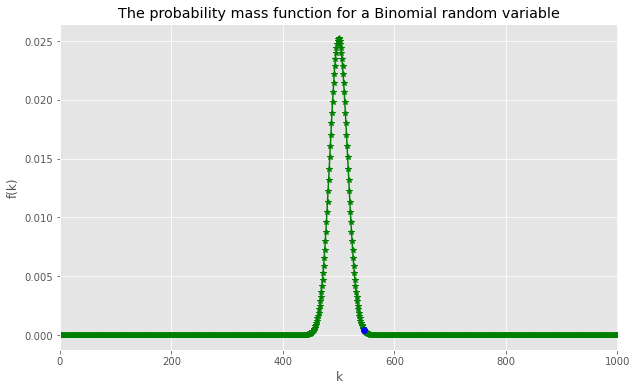

In [171]:
f = lambda k: binom.pmf(k, n=1000,p=0.5)

x = np.arange(1001);
plt.plot(x, f(x),'*-', c="g")
plt.plot(545,f(545),'o', c="b")
plt.title("The probability mass function for a Binomial random variable")
plt.xlabel("k")
plt.ylabel("f(k)")
plt.xlim([0,1001])
plt.show()

Suppose that in our experiment, we saw $545$ heads. The probability of this occurring is 
f(k = 545):

In [172]:
binom.pmf(545, n=1000,p=0.5)

0.0004388554305576971

In hypothesis testing, the most important question is: what is the probability of seeing a value as extreme or more extreme than the value that we observed? 

We might say that any result $\geq 545$ is 'as or more extreme'.

So the probability of seeing as extreme of an outcome is:

In [173]:
s = sum(binom.pmf(np.arange(545,1001),n=1000,p=0.5))
print(s)
print(1-s)

0.0024308681959378338
0.9975691318040621


Actually, seeing any result $\leq 455$ would be 'as or more extreme' too. Why?

So the probability of seeing as extreme of an outcome is:

In [174]:
s1 = sum(binom.pmf(np.arange(0,456),n=1000,p=0.5)) # why 456? 
s2 = sum(binom.pmf(np.arange(545,1001),n=1000,p=0.5))
print(s1)
print(s2)
s = s1 + s2

print(s)
print(1-s)

0.002430868195937834
0.0024308681959378338
0.0048617363918756675
0.9951382636081243


So the probability of seeing so many heads or so many tails is just $0.49\%$. So it is very unlikely that if the coin were fair, we would see this result! Maybe so unlikely that we would declare that the coin is unfair? In this case, the null hypothesis is

$$
H_0: \text{the coin is fair, i.e., $p=0.5$}.
$$

The alternative hypothesis, $H_a$, is typically the hypothesis that the researcher wants to validate. In this case: 

$$
H_a: \text{the coin is unfair, i.e., $p\neq 0.5$}.
$$

We also choose a *significance level* for the test, $\alpha$, traditionally $1\%$ or $5\%$. 
In this case, let's choose a significance level of $\alpha = 1\%$. 

We then collect a *random sample*. In this case, we flip the coin 1000 times and count the number of heads (in this case 545). More generally, we collect a random sample of data from the population of interest. 

Finally, assuming the null hypothesis is true, we compute how likely it is to see a number that is at least as far from the expected value as the number obtained from the random sample. In this case, the *p-value* is $0.49$ way smaller than the chosen significance level, $\alpha = 1\%$, then we reject the null hypothesis and declare the coin to be unfair.  